<a href="https://colab.research.google.com/github/RichardFreedman/CRIM-Project-RF/blob/master/CRIM_Intervals_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load CRIM Intervals Software

In [1]:
!git clone https://github.com/HCDigitalScholarship/intervals.git
!pip install httpx


fatal: destination path 'intervals' already exists and is not an empty directory.


## Start CRIM Intervals

In [2]:
from intervals.main_objs import *


## Load MEI Files from CRIM or Github by pasting one or more of [these links](https://docs.google.com/spreadsheets/d/1TzRqnzgcYYuQqZR78c5nizIsBWp4pnblm2wbU03uuSQ/edit?auth_email=rfreedma@haverford.edu#gid=0) below.

*Note:  each file must be in quotation marks and separated by commas







In [3]:
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Model_0008.mei', 'https://crimproject.org/mei/CRIM_Mass_0005_5.mei'])


Requesting file from https://crimproject.org/mei/CRIM_Model_0008.mei...
Successfully imported.
Requesting file from https://crimproject.org/mei/CRIM_Mass_0005_5.mei...
Successfully imported.


## Give the scores short names, in order according to the way they were listed above

In [4]:
model, mass = corpus.scores

## Now apply various methods to the scores:
* getNoteRest returns all the notes and rests, each voice as a column
* getDuration returns the durations for all notes and rests, as above
* getMelodic returns the melodic intervals in each voice as a column
* getHarmonic returns pairs of harmonic intervals between each pair of voices
* getNgrams  returns segments of various kinds, melodic (one voice) or modular (pairs of voices, including vertical and horizontal motion)




---

## Documentation available via this command:

print(model.getNgrams.__doc__)

---








In [5]:
print(model.getMelodic.__doc__)

Return melodic intervals for all voice pairs. Each melodic interval
        is associated with the starting offset of the second note in the
        interval. 

        :param str kind: use "d" for diatonic intervals without quality, "q"
            (default) for diatonic intervals with quality, or "s" for semitonal
            intervals. Only the first character is used, and it's case
            insensitive.
        :param bool directed: defaults to True which shows that the voice that
            is lower on the staff is a higher pitch than the voice that is
            higher on the staff. This is desginated with a "-" prefix.
        :param bool compound: whether to use compound (True, default) or simple
            (False) intervals. In the case of simple diatonic intervals, it
            simplifies to within the octave, so octaves don't get simplified to
            unisons. But for semitonal intervals, an interval of an octave
            (12 semitones) would does get simplifi

In [14]:
notes = model.getNoteRest()
notes.fillna(value= "-", inplace=True)
notes.head()

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,-,-,-
8.0,-,Rest,Rest,Rest
12.0,C5,-,-,-
16.0,D5,G3,Rest,Rest


In [46]:
notes.stack().value_counts()


-       1050
Rest     192
C4       135
G4        94
G3        84
D4        84
E4        79
C5        62
B3        60
F4        52
A3        51
C3        45
B4        42
F3        38
D5        38
A4        37
E5        31
E3        27
D3        14
A2         4
B2         4
F5         4
G2         3
B-2        1
B-3        1
dtype: int64

In [49]:
notes.apply(pd.Series.value_counts).fillna(0).astype(int)

,[Superius],Altus,Tenor,Bassus
-,271,216,279,284
A2,0,0,0,4
A3,0,21,12,18
A4,23,10,4,0
B-2,0,0,0,1
B-3,0,0,0,1
B2,0,0,0,4
B3,0,28,27,5
B4,41,1,0,0
C3,0,0,0,45


In [73]:
mel_int = mass.getMelodic(kind='d')
mel_int.fillna(value= "-", inplace=True)
mel_int

# voice = mel_int.iloc[:, 0]
# voice


,Sup[erius],Altus,Tenor,Bassus
0.0,-,-,Rest,Rest
4.0,4,-,-,-
8.0,-,-,Rest,Rest
12.0,1,-,-,-
16.0,2,-,Rest,Rest
...,...,...,...,...
706.0,1,-2,-,-
707.0,-,-2,-,-
708.0,-,2,-,-
710.0,-2,-,-,-


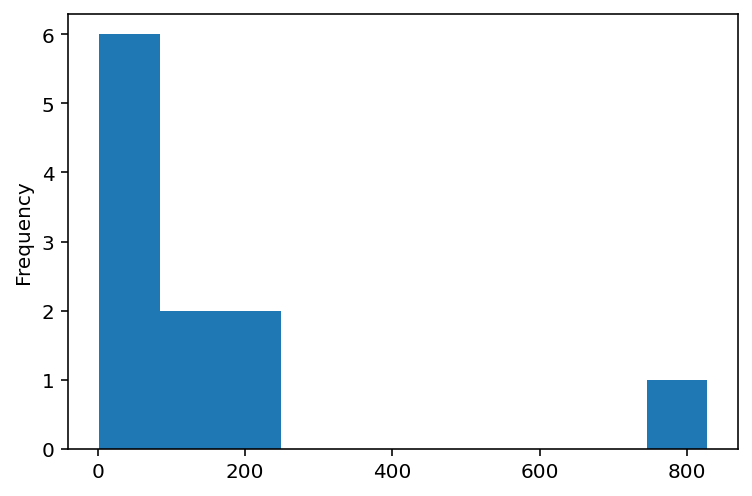

In [53]:
durs = mass.getDuration()
durs.fillna(value= "-", inplace=True)
# durs.head()
d =  durs.stack().value_counts()
d.plot.hist()

In [28]:
notes_durs = pd.concat([notes, durs], axis=1)
notes_durs


,[Superius],Altus,Tenor,Bassus,Sup[erius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest,4,8,8,8
4.0,C5,-,-,-,8,-,-,-
8.0,-,Rest,Rest,Rest,-,8,8,8
12.0,C5,-,-,-,4,-,-,-
16.0,D5,G3,Rest,Rest,4,4,8,8
...,...,...,...,...,...,...,...,...
1256.0,-,-,D4,G3,NaN,NaN,NaN,NaN
1268.0,C5,G4,-,-,NaN,NaN,NaN,NaN
1272.0,-,-,C4,C3,NaN,NaN,NaN,NaN
1284.0,C5,G4,-,-,NaN,NaN,NaN,NaN


In [32]:
notes_durs_s = notes_durs.iloc[:, [0,4]]
notes_durs_s

,[Superius],Sup[erius]
0.0,G4,4
4.0,C5,8
8.0,-,-
12.0,C5,4
16.0,D5,4
...,...,...
1256.0,-,NaN
1268.0,C5,NaN
1272.0,-,NaN
1284.0,C5,NaN


In [38]:
mel = model.getMelodic()
model.getNgrams(df=mel, n=3)



,[Superius],Altus,Tenor,Bassus
4.0,"P4, P1, M2",NaN,NaN,NaN
12.0,"P1, M2, M2",NaN,NaN,NaN
16.0,"M2, M2, -M3",NaN,NaN,NaN
20.0,NaN,"P4, P1, M2",NaN,NaN
28.0,NaN,"P1, M2, M2",NaN,NaN
...,...,...,...,...
1240.0,"-M2, -M2, -m2","P1, -m3, m2","P1, -m2, m2","P8, -P4, M2"
1244.0,"-M2, -m2, m2","-m3, m2, M2","-m2, m2, M2","-P4, M2, -M2"
1248.0,NaN,"m2, M2, P1","m2, M2, -M2","M2, -M2, -P5"
1252.0,"-m2, m2, P1","M2, P1, P1",NaN,NaN


In [13]:
modules = model.getNgrams(how='modules', cell_type=str)
modules.iloc[:, 0:6]


,Bassus_Tenor,Bassus_Altus,Bassus_[Superius],Tenor_Altus,Tenor_[Superius],Altus_[Superius]
16.0,NaN,NaN,NaN,NaN,NaN,"12_2, 10_-3, 8"
20.0,NaN,NaN,NaN,NaN,NaN,"10_-3, 8_Held, 8"
32.0,NaN,NaN,NaN,"5_Held, 3_Rest, 1",NaN,NaN
36.0,NaN,NaN,NaN,"3_Rest, 1_Held, 1",NaN,NaN
48.0,"12_Held, 10_Held, 8",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1248.0,"3_-2, 3_Held, 5","6_-2, 7_Held, 8","10_-2, 9_Held, 10","4_-2, 5_Held, 4","8_-2, 7_Held, 6","5_-2, 3_Held, 3"
1252.0,"3_Held, 5_2, 5","7_Held, 8_2, 8","9_Held, 10_2, 11","5_Held, 4_2, 4","7_Held, 6_2, 7","3_Held, 3_2, 4"
1256.0,"5_2, 5_Held, 8","8_2, 8_Held, 12","10_2, 11_Held, 15","4_2, 4_Held, 5","6_2, 7_Held, 8","3_2, 4_Held, 4"
1268.0,"5_Held, 8_1, 8","8_Held, 12_1, 12","11_Held, 15_1, 15","4_Held, 5_1, 5","7_Held, 8_1, 8","4_Held, 4_1, 4"
